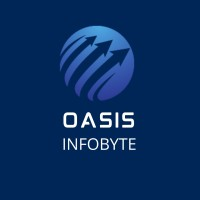

### **Name :** <font color = #5a5a5a>Harshal Prakash Margaj<font/>
### **Task 2 :** <font color = #5a5a5a>UNEMPLOYMENT ANALYSIS WITH PYTHON<font/>
### **Description :** <font color = #5a5a5a> Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project. Download Dataset from  [here](https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india)<font/>

# **<font color = red>Unemployment Analysis using** <font color = green>`Unemployment in India.csv`<font><font/>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Loading the dataset**

In [ ]:
df = pd.read_csv("/content/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### <font color = #0E86D4>**Let's check to see whether this dataset has any null values:**<font/>

In [ ]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

### <font color = #0E86D4>**Removing null values**<font/>

In [ ]:
df = df[df ['Region'].notnull()]

### <font color = #0E86D4>**Renaming columns for better understanding of this data**<font/>

In [ ]:
df.columns = ["Region", 
              "Date", 
              "Frequency", 
              "Estimated Unemployment Rate", 
              "Estimated Employed", 
              "Estimated Labour Participation Rate", 
              "Area"]

# **Correlation Matrix**

In [ ]:
df.corr()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
Estimated Unemployment Rate,1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate,0.002558,0.011300,1.000000


<Axes: >

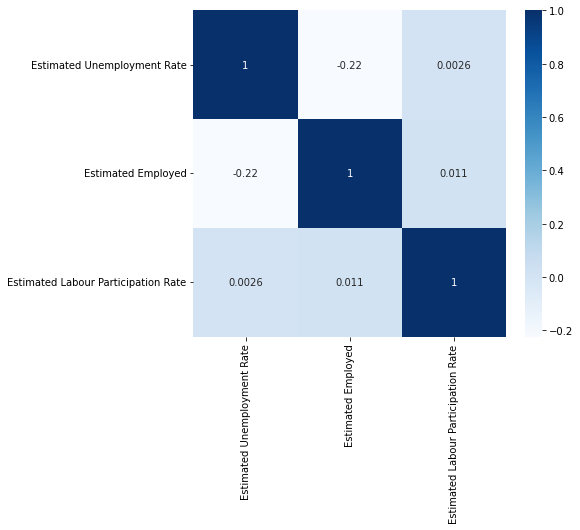

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (7,6))
sns.heatmap(corr, annot = True,  ax = ax, cmap = "Blues")

# **Data Visualization**

### **<font color = #0E86D4>Estimated Employees according to different regions of India:<font/>**

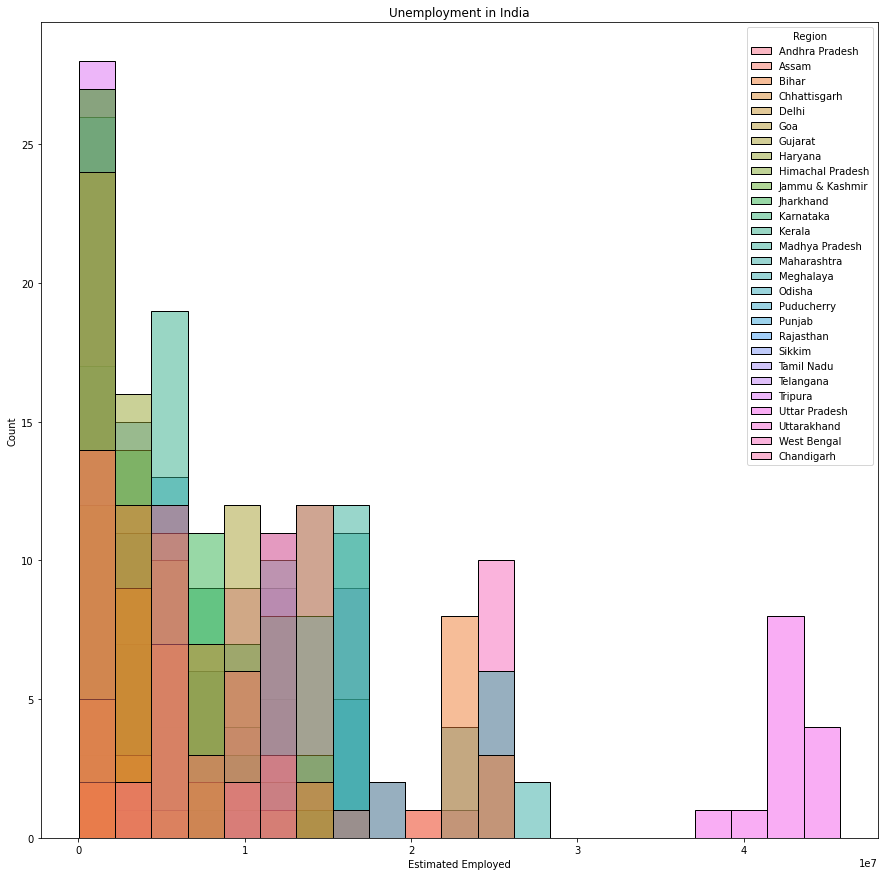

In [ ]:
plt.figure(figsize=(15, 15))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated Employed", hue = "Region", data = df)
plt.show()

### **<font color = #0E86D4>Estimated Unemployment Rate according to different regions of India:<font/>**

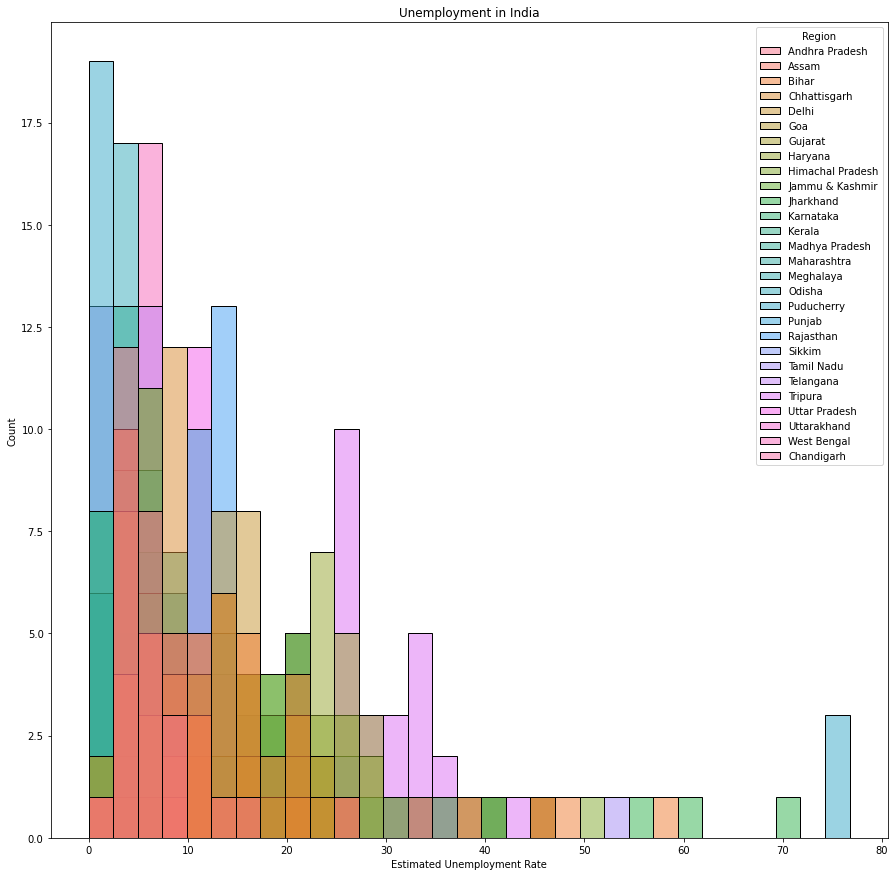

In [ ]:
plt.figure(figsize=(15, 15))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated Unemployment Rate", hue = "Region", data = df)
plt.show()

### **<font color = #0E86D4>Estimated Labour Participation Rate according to different regions:<font/>**

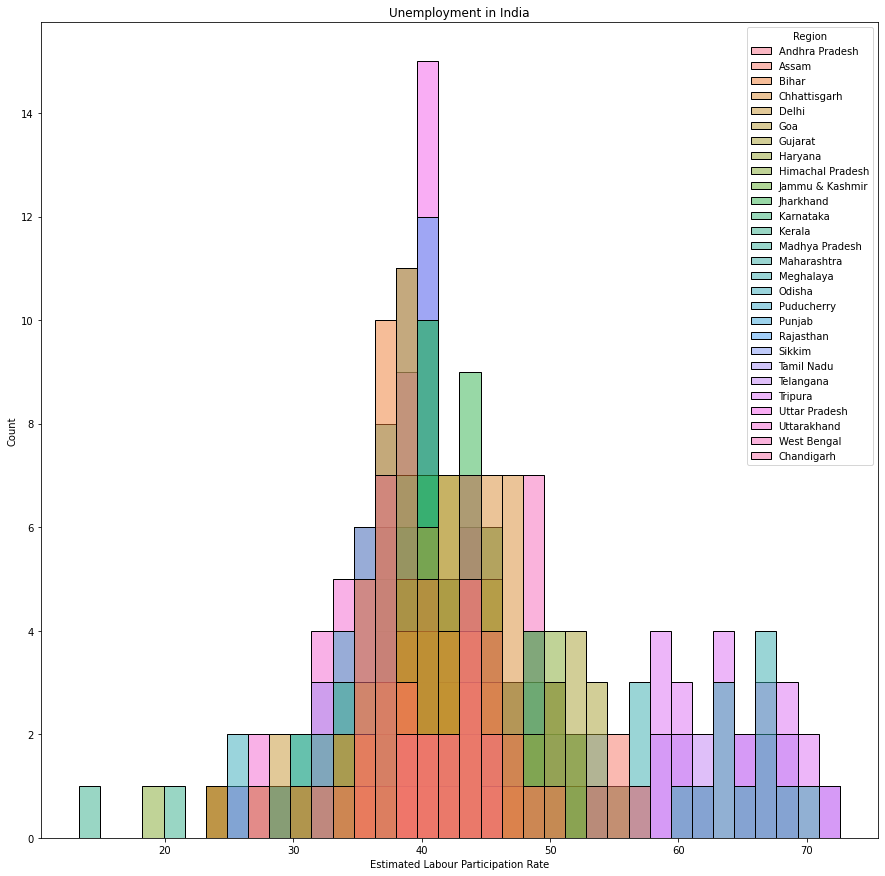

In [ ]:
plt.figure(figsize=(15, 15))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated Labour Participation Rate", hue = "Region", data = df)
plt.show()

### **<font color = #0E86D4>Unemployment Rate of each Indian area by region:<font/>**

In [ ]:
unemploment = df[["Region", "Area", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Area", "Region"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

# **<font color = red>Unemployment Analysis using** <font color = green>`Unemployment_Rate_upto_11_2020.csv`<font/><font/>

# **Loading the dataset**

In [ ]:
df2 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,State,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df2.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [ ]:
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### <font color = #0E86D4>**Let's check to see whether this dataset has any null values:**<font/>

In [ ]:
df2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

### <font color = #0E86D4>**Renaming columns for better understanding of this data**<font/>

In [ ]:
df2.columns = ["State", 
              "Date", 
              "Frequency", 
              "Estimated Unemployment Rate", 
              "Estimated Employed", 
              "Estimated Labour Participation Rate", 
              "Region",
              "Longitude",
              "Latitude"]

# **Correlation Matrix**

In [ ]:
df2.corr()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Longitude,Latitude
Estimated Unemployment Rate,1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate,-0.073540,-0.047948,1.000000,0.080372,0.397836
Longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
Latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


<Axes: >

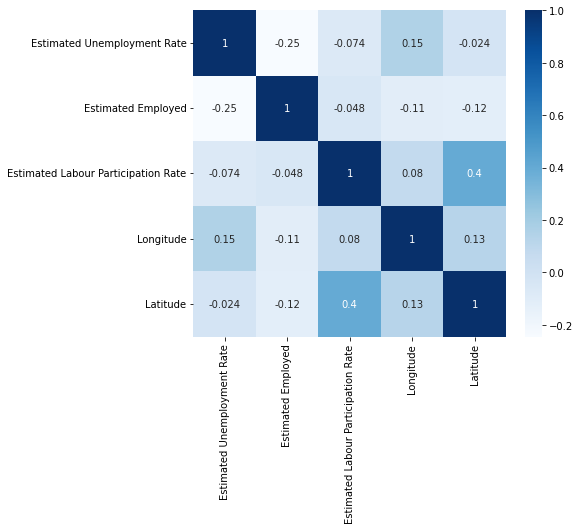

In [ ]:
corr = df2.corr()
fig, ax = plt.subplots(figsize = (7,6))
sns.heatmap(corr, annot = True,  ax = ax, cmap = "Blues")

# **Data Visualization**

### **<font color = #0E86D4>Estimated Employees according to different regions of India:<font/>**

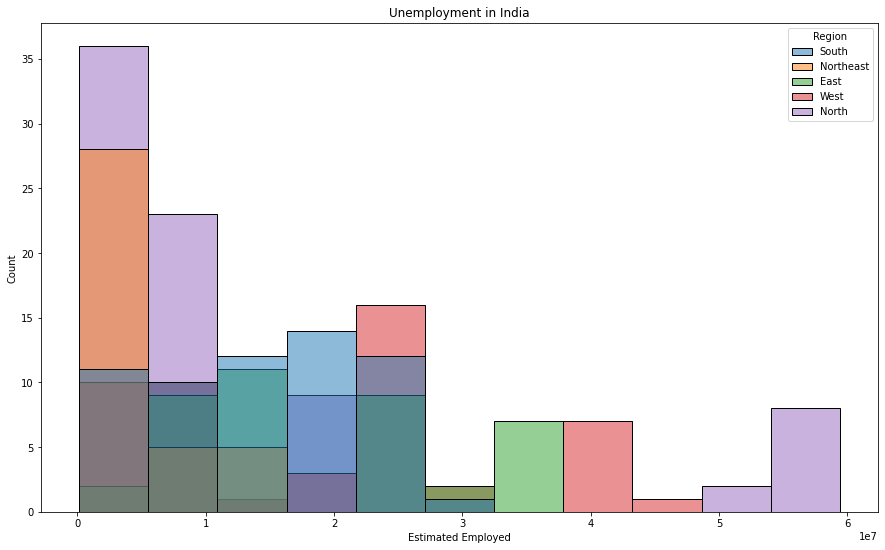

In [ ]:
plt.figure(figsize=(15, 9))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated Employed", hue = "Region", data = df2)
plt.show()

### **<font color = #0E86D4>Estimated Unemployment Rate according to different regions of India:<font/>**

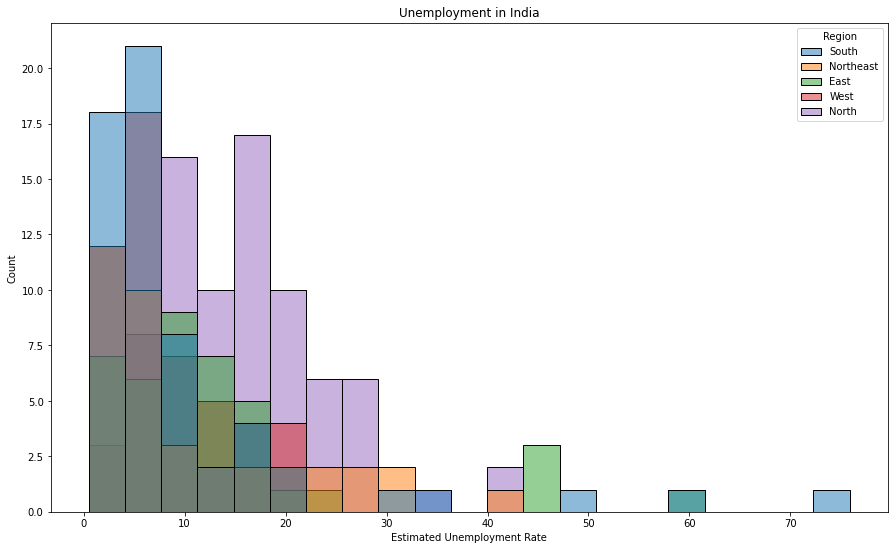

In [ ]:
plt.figure(figsize=(15, 9))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated Unemployment Rate", hue = "Region", data = df2)
plt.show()

### **<font color = #0E86D4>Estimated Labour Participation Rate according to different regions:<font/>**

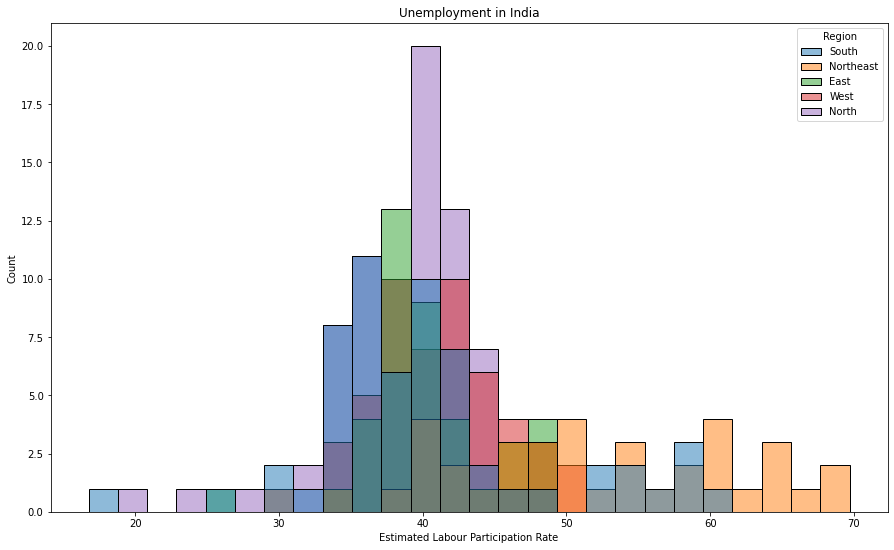

In [ ]:
plt.figure(figsize=(15, 9))
plt.title("Unemployment in India")
sns.histplot(x = "Estimated Labour Participation Rate", hue = "Region", data = df2)
plt.show()

### **<font color = #0E86D4>Unemployment Rate of each Indian state by region:<font/>**

In [ ]:
unemploment = df2[["Region", "State", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "State"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

# **<center>Thank You!</center>**